In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/home/kalebu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kalebu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kalebu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/kalebu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: 

In [2]:
data_x = [
    'good',
    'well done',
    'nice',
    'Excellent',
    'Bad',
    'OOps I hate it deadly',
    'embrassing',
    'Hate you'
]

In [4]:
label_x = np.array([1,1,1,1, 0,0,0,0])

In [5]:
#_______________preprocessing the dataset_________________

one_hot_x = [tf.keras.preprocessing.text.one_hot(d, 50) for d in data_x]

In [6]:
one_hot_x

[[21], [9, 34], [24], [20], [28], [41, 26, 9, 17, 26], [36], [9, 41]]

In [7]:
#___________padding the document to maximum length of 4words_______________

padded_x = tf.keras.preprocessing.sequence.pad_sequences(one_hot_x, maxlen=4, padding = 'post')

In [8]:
padded_x

array([[21,  0,  0,  0],
       [ 9, 34,  0,  0],
       [24,  0,  0,  0],
       [20,  0,  0,  0],
       [28,  0,  0,  0],
       [26,  9, 17, 26],
       [36,  0,  0,  0],
       [ 9, 41,  0,  0]], dtype=int32)

In [9]:
model = tf.keras.models.Sequential()

In [10]:
model.add(tf.keras.layers.Embedding(50, 8, input_length=4))

In [11]:
model.add(tf.keras.layers.Flatten())

In [12]:
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 8)              400       
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(padded_x, label_x, epochs=1000, batch_size=2, verbose=0)

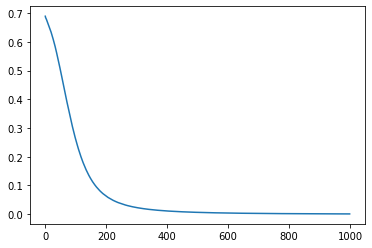

In [16]:
plt.plot(history.history['loss'])

In [17]:
one_hot_word = [tf.keras.preprocessing.text.one_hot('Hate', 50)]
pad_word = tf.keras.preprocessing.sequence.pad_sequences(one_hot_word, maxlen=4,  padding='post')
model.predict(pad_word)

array([[0.5398622]], dtype=float32)